# **A/B Testing Using Python**

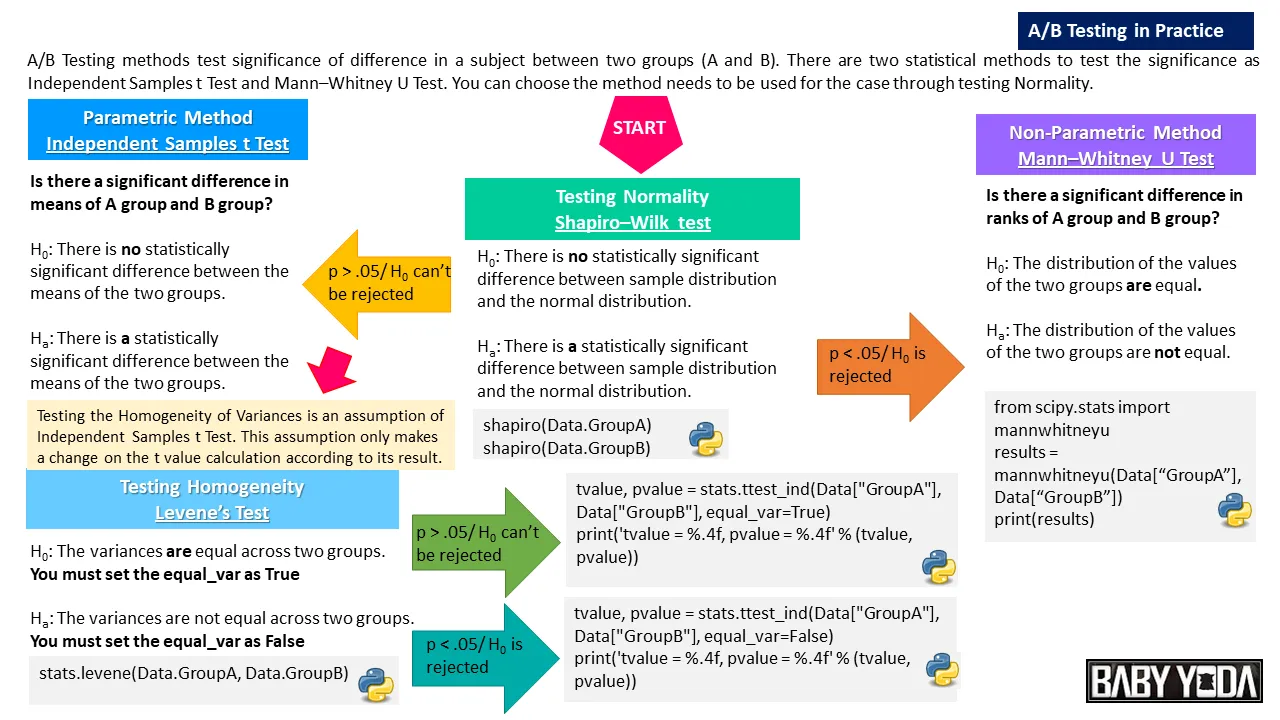

# **Project Overview:**

#### **Problem Scenario:**

- A company recently introduced a new bidding type, **“average bidding”**, as an alternative to its exisiting bidding type, called **“maximum bidding”**.

- One of their clients, has decided to test this new feature and wants to conduct an **A/B test** to understand if **"average bidding"** brings more conversions than **"maximum bidding".**

* In this A/B test, the company randomly splits its audience into two equally sized groups;

    1. the **test Group**
    2. the **control group**

* Company ad campaign with “maximum bidding” is served to “control group” and
* another campaign with “average bidding” is served to the “test group”

* The A/B test has run for 1 month and the company now expects to analyze and present the results
of this A/B test.

### **Objectives :**
1. How would you define the hypothesis of this A/B test?
2. Which statistical test did used, and why?
3. Can we conclude statistically significant results?
4. Based on your answer to Question 3, what would be your recommendation to client?

### **Aim:**
1. Presentation should last about 15 minutes, and should be presented in English.
2. The ultimate success metric for the company is `Number of Purchases`. Therefore, we should focus on `Purchase metrics` for statistical testing.
3. Explain the concept of statistical testing for a non-technical audience.
4. Use visualizations to compare test and control group metrics, such as Website Click Through Rate, Cost per Action, and Conversion Rates in addition to Purchase numbers.
5. If any trends, anomalies or other patterns, discuss these in presentation.
6. We can make assumptions if needed.

### **Dataset Overview :**

* Dataset contains 4 different metric variables observed during one month:
    
  * User sees an ad (**Impression**)
  * User clicks on the website link on the ad (**Click**)
  * User purchases the product (**Purchase**)
  * Value from the purchase (**Earning**)

# **Let's Analyze the data**

### **1. Necessary libraries**

In [1]:
import statistics
import pandas as pd
import scipy.stats as stats
from scipy.stats import shapiro
from scipy.stats import mannwhitneyu
import numpy as np
import seaborn as sns

from termcolor import colored

import matplotlib.pyplot as plt
%matplotlib inline

import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter("ignore", category=ConvergenceWarning)

## 2. Loading & Reading Dataset

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#Importing the Datasets: Two sets are stored in different sheets of excel
DataGroupA = pd.read_excel("/content/drive/MyDrive/Python/Datasets/A B Testing/ab_testing_data.xlsx" , sheet_name= "Control Group")
DataGroupB = pd.read_excel("/content/drive/MyDrive/Python/Datasets/A B Testing/ab_testing_data.xlsx" , sheet_name= "Test Group")

**Let's explore DataGroupA**

In [4]:
DataGroupA.head()

,Impression,Click,Purchase,Earning
0,82529.459271,6090.077317,665.211255,2311.277143
1,98050.451926,3382.861786,315.084895,1742.806855
2,82696.023549,4167.965750,458.083738,1797.827447
3,109914.400398,4910.882240,487.090773,1696.229178
4,108457.762630,5987.655811,441.034050,1543.720179


In [5]:
DataGroupA.shape

(40, 4)

In [6]:
DataGroupA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Impression  40 non-null     float64
 1   Click       40 non-null     float64
 2   Purchase    40 non-null     float64
 3   Earning     40 non-null     float64
dtypes: float64(4)
memory usage: 1.4 KB


In [7]:
DataGroupA.describe()

,Impression,Click,Purchase,Earning
count,40.000000,40.000000,40.000000,40.000000
mean,101711.449068,5100.657373,550.894059,1908.568300
std,20302.157862,1329.985498,134.108201,302.917783
min,45475.942965,2189.753157,267.028943,1253.989525
25%,85726.690349,4124.304129,470.095533,1685.847205
50%,99790.701078,5001.220602,531.206307,1975.160522
75%,115212.816543,5923.803596,637.957088,2119.802784
max,147539.336329,7959.125069,801.795020,2497.295218


**Let's explore DataGroupB**

In [8]:
DataGroupB.head()

,Impression,Click,Purchase,Earning
0,120103.503796,3216.547958,702.160346,1939.611243
1,134775.943363,3635.082422,834.054286,2929.405820
2,107806.620788,3057.143560,422.934258,2526.244877
3,116445.275526,4650.473911,429.033535,2281.428574
4,145082.516838,5201.387724,749.860442,2781.697521


In [9]:
print("Dataset Info:", "\n")
DataGroupB.info()
print("Summary Statistics of the Test Group:", "\n", DataGroupB.describe())

Dataset Info: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Impression  40 non-null     float64
 1   Click       40 non-null     float64
 2   Purchase    40 non-null     float64
 3   Earning     40 non-null     float64
dtypes: float64(4)
memory usage: 1.4 KB
Summary Statistics of the Test Group: 
           Impression        Click    Purchase      Earning
count      40.000000    40.000000   40.000000    40.000000
mean   120512.411758  3967.549761  582.106097  2514.890733
std     18807.448712   923.095073  161.152513   282.730852
min     79033.834921  1836.629861  311.629515  1939.611243
25%    112691.970770  3376.819024  444.626828  2280.537426
50%    119291.300775  3931.359804  551.355732  2544.666107
75%    132050.578933  4660.497911  699.862360  2761.545405
max    158605.920483  6019.695079  889.910460  3171.489708


## **Feature Engineering**

**Feature Engineering: Conversion Rate**

**For GroupA**

In [10]:
#Feature Engineering: Conversion Rate (GroupA)
DataGroupA["Conversion Rate"] = DataGroupA["Purchase"]/DataGroupA["Click"]*100
print(DataGroupA.head())

      Impression        Click    Purchase      Earning  Conversion Rate
0   82529.459271  6090.077317  665.211255  2311.277143        10.922870
1   98050.451926  3382.861786  315.084895  1742.806855         9.314152
2   82696.023549  4167.965750  458.083738  1797.827447        10.990583
3  109914.400398  4910.882240  487.090773  1696.229178         9.918600
4  108457.762630  5987.655811  441.034050  1543.720179         7.365721


**For GroupB**

In [11]:
#Feature Engineering: Conversion Rate (GroupB)
DataGroupB["Conversion Rate"] = DataGroupB["Purchase"]/DataGroupB["Click"]*100
print(DataGroupB.head())

      Impression        Click    Purchase      Earning  Conversion Rate
0  120103.503796  3216.547958  702.160346  1939.611243        21.829625
1  134775.943363  3635.082422  834.054286  2929.405820        22.944577
2  107806.620788  3057.143560  422.934258  2526.244877        13.834295
3  116445.275526  4650.473911  429.033535  2281.428574         9.225587
4  145082.516838  5201.387724  749.860442  2781.697521        14.416546


**Feature Engineering: Earning per Purchase**

**For GroupA**

In [12]:
#Feature Engineering: Earning per Purchase (GroupA)
DataGroupA["Earning per Purchase"] = DataGroupA["Earning"]/DataGroupA["Purchase"]*100
print(DataGroupA.head())

      Impression        Click    Purchase      Earning  Conversion Rate  \
0   82529.459271  6090.077317  665.211255  2311.277143        10.922870   
1   98050.451926  3382.861786  315.084895  1742.806855         9.314152   
2   82696.023549  4167.965750  458.083738  1797.827447        10.990583   
3  109914.400398  4910.882240  487.090773  1696.229178         9.918600   
4  108457.762630  5987.655811  441.034050  1543.720179         7.365721   

   Earning per Purchase  
0            347.450096  
1            553.122947  
2            392.466987  
3            348.236771  
4            350.022902  


**For GroupB**

In [13]:
#Feature Engineering: Earning per Purchase (GroupB)
DataGroupB["Earning per Purchase"] = DataGroupB["Earning"]/DataGroupB["Purchase"]*100
print(DataGroupB.head())

      Impression        Click    Purchase      Earning  Conversion Rate  \
0  120103.503796  3216.547958  702.160346  1939.611243        21.829625   
1  134775.943363  3635.082422  834.054286  2929.405820        22.944577   
2  107806.620788  3057.143560  422.934258  2526.244877        13.834295   
3  116445.275526  4650.473911  429.033535  2281.428574         9.225587   
4  145082.516838  5201.387724  749.860442  2781.697521        14.416546   

   Earning per Purchase  
0            276.234802  
1            351.224839  
2            597.313845  
3            531.759965  
4            370.962030  


## **Data Manipulation**

**Data Manipulation: Indication of Groups in A New Variable**

**For GroupA**

In [14]:
#Data Manipulation: Indication of Groups in A New Variable (GroupA)
DataGroupA["Group"] = "GroupA"
print(DataGroupA.head())

      Impression        Click    Purchase      Earning  Conversion Rate  \
0   82529.459271  6090.077317  665.211255  2311.277143        10.922870   
1   98050.451926  3382.861786  315.084895  1742.806855         9.314152   
2   82696.023549  4167.965750  458.083738  1797.827447        10.990583   
3  109914.400398  4910.882240  487.090773  1696.229178         9.918600   
4  108457.762630  5987.655811  441.034050  1543.720179         7.365721   

   Earning per Purchase   Group  
0            347.450096  GroupA  
1            553.122947  GroupA  
2            392.466987  GroupA  
3            348.236771  GroupA  
4            350.022902  GroupA  


**For GroupB**

In [15]:
#Data Manipulation: Indication of Groups in A New Variable (GroupB)
DataGroupB["Group"] = "GroupB"
print(DataGroupB.head())

      Impression        Click    Purchase      Earning  Conversion Rate  \
0  120103.503796  3216.547958  702.160346  1939.611243        21.829625   
1  134775.943363  3635.082422  834.054286  2929.405820        22.944577   
2  107806.620788  3057.143560  422.934258  2526.244877        13.834295   
3  116445.275526  4650.473911  429.033535  2281.428574         9.225587   
4  145082.516838  5201.387724  749.860442  2781.697521        14.416546   

   Earning per Purchase   Group  
0            276.234802  GroupB  
1            351.224839  GroupB  
2            597.313845  GroupB  
3            531.759965  GroupB  
4            370.962030  GroupB  


**Let's Combine the Dataset**

In [16]:
#Combining the Datasets
Data = pd.concat([DataGroupA, DataGroupB], ignore_index=True)
Data

,Impression,Click,Purchase,Earning,Conversion Rate,Earning per Purchase,Group
0,82529.459271,6090.077317,665.211255,2311.277143,10.922870,347.450096,GroupA
1,98050.451926,3382.861786,315.084895,1742.806855,9.314152,553.122947,GroupA
2,82696.023549,4167.965750,458.083738,1797.827447,10.990583,392.466987,GroupA
3,109914.400398,4910.882240,487.090773,1696.229178,9.918600,348.236771,GroupA
4,108457.762630,5987.655811,441.034050,1543.720179,7.365721,350.022902,GroupA
...,...,...,...,...,...,...,...
75,79234.911929,6002.213585,382.047116,2277.863984,6.365104,596.225934,GroupB
76,130702.239410,3626.320072,449.824592,2530.841327,12.404437,562.628494,GroupB
77,116481.873365,4702.782468,472.453725,2597.917632,10.046259,549.877690,GroupB
78,79033.834921,4495.428177,425.359102,2595.857880,9.462038,610.274440,GroupB


# **A/B Testing for Purchase:**

### **Summary Statistics**

In [18]:
print("Summary Statistics by Groups for Purchase:","\n")

result3 = Data.groupby("Group")["Purchase"].aggregate(["count","mean","std","median","min","max"])
result4 = result3.transpose()
print("Purchase:", "\n")
print(result4)

Summary Statistics by Groups for Purchase: 

Purchase: 

Group       GroupA      GroupB
count    40.000000   40.000000
mean    550.894059  582.106097
std     134.108201  161.152513
median  531.206307  551.355732
min     267.028943  311.629515
max     801.795020  889.910460


### **Distribution by Histogram**

Histogram by Groups for Purchase 



<ipython-input-20-5814419a69c6>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot( DataGroupA["Purchase"] , color="skyblue", label="GroupA")
<ipython-input-20-5814419a69c6>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot( DataGroupB["Purchase"] , color="red", label="GroupB")


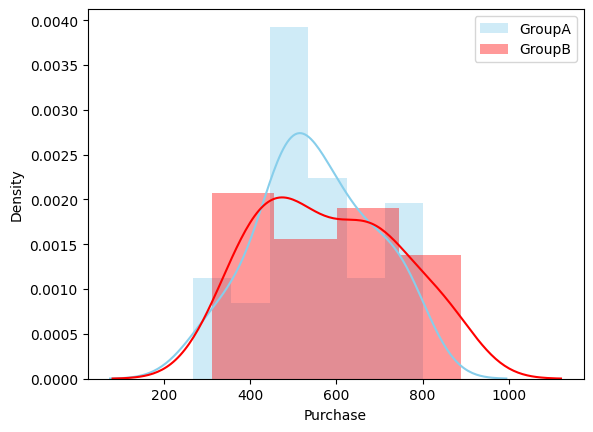

In [20]:
print("Histogram by Groups for Purchase", "\n")
#sns.displot(Data, x=x, hue="Group", element="step", kde=True)
#plt.show()
sns.distplot( DataGroupA["Purchase"] , color="skyblue", label="GroupA")
sns.distplot( DataGroupB["Purchase"] , color="red", label="GroupB")
plt.legend()
plt.show()

### **Outlier Checking by BoxPlot**

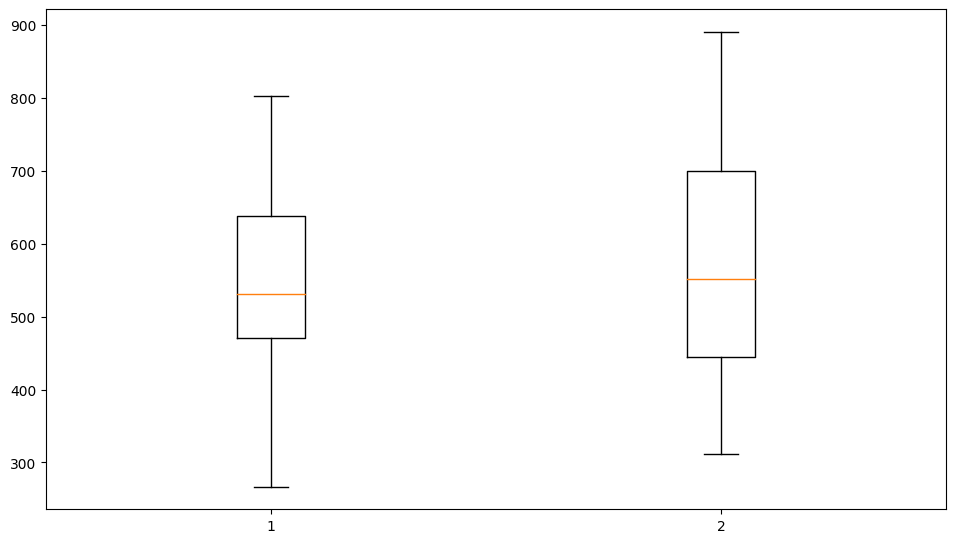

In [30]:
data = [DataGroupA["Purchase"], DataGroupB["Purchase"]]
fig = plt.figure(figsize =(9, 5))

# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])

# Creating plot
bp = ax.boxplot(data)

# show plot
plt.show()

Box Plot by Groups for Purchase: 



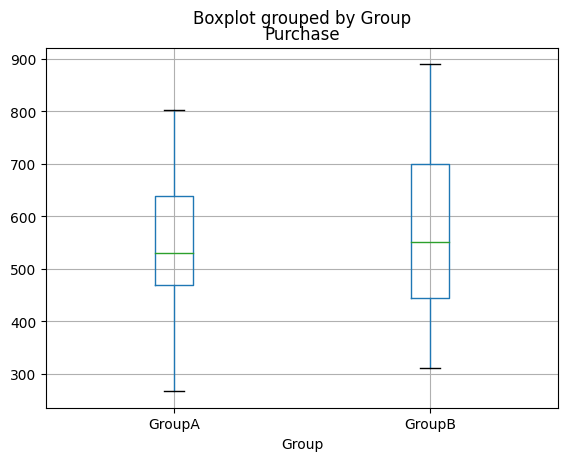

<Figure size 640x480 with 0 Axes>

In [29]:
Data.boxplot("Purchase", by="Group",return_type=None)
fig = plt.figure()

plt.suptitle("")

# show plot
print("Box Plot by Groups for Purchase:", "\n")
plt.show()

### **Step-1: Testing the Normality Assumption**

**Info:**
* As it stated before `Average Bidding` was applied to the `test group` and test group data has higher average for Purchase. Before hypothesis testing is done, hypothesis checks are done.
  * These are Assumption of Normality and
  * Homogeneity of Variance.
* Whether the control and test groups comply with the normality assumption will be tested separately over the Purchase variable.

**Hypothesis:**

  * **H0:** the distribution of the sample is not significantly different from a normal distribution
  * **H1:** the distribution in question is significantly different from a normal distribution.


Where p and p0 stand for the Purchase of the maximum and average bidding method.

The confidence level will be set as 95% or 0.95. Hence, α=1−0.95=0.05

In [32]:
print("Step-1: Testing the Normality Assumption for Purchase: ", "\n")

GroupA_shaphiro_w, GroupA_shaphiro_p = shapiro(DataGroupA["Purchase"])
GroupB_shaphiro_w, GroupB_shaphiro_p = shapiro(DataGroupB["Purchase"])
print("GroupA_shaphiro_p = %.3f, GroupB_shaphiro_p = %.3f" % (GroupA_shaphiro_p, GroupB_shaphiro_p),"\n")

Step-1: Testing the Normality Assumption for Purchase:  

GroupA_shaphiro_p = 0.589, GroupB_shaphiro_p = 0.154 



**Info:**
* If the test is non-significant (p> .05) it tells us that the distribution of the sample is not significantly different from a normal distribution.
* If, however, the test is significant (p < .05) then the distribution in question is significantly different from a normal distribution.

**Insights:**
* As both of the Group's p-values are bigger than o.o5, (p> .05)
* therefore we can not reject the null hypothesis,
* thus, we can say the distribution of the sample is not significantly different from a normal distribution.
* Means, normality assumption is fullfiled.

### **Step-2: Testing Homogeneity Levene's Test:**

**Hypothesis:**

  * **H0:** the variance among groups is equal.
  * **H1:** are not equal.

In [33]:
print("Step-2: Testing the Homogeneity Assumption for Purchase:","\n")

levene_F, levene_p = stats.levene(DataGroupA["Purchase"], DataGroupB["Purchase"])
print("levene_F = %.3f, levene_p = %.3f" % (levene_F, levene_p),"\n")

Step-2: Testing the Homogeneity Assumption for Purchase: 

levene_F = 2.639, levene_p = 0.108 



**Info:**
* A p-value less than 0.05 is typically considered to be statistically significant, in which case the null hypothesis should be rejected.
* A p-value greater than 0.05 means that deviation from the null hypothesis is not statistically significant, and the null hypothesis is not rejected.

**Insights:**
* The p-value for the Levene test is greater than 0.05,
* therefore we can not reject the null hypothesis.
* thus we can say that the variances are not significantly different from each other
* Means the homogeneity assumption of the variance is met.

**Info:**

* **if levene_p > 0.05:**
  * Alternative 1--> Independent Samples t-Test
  * equal_var = True

* **if levene_p < 0.05:**
  * Alternative 1--> Independent Samples t-Test
  * equal_var = False

**Decesion:**
* As our Homogeneity assumption is fullfilled and
* levene_p> 0.05
* we will select Independent Sample t-Test where,
* equal_var = True

**Aditional Info:**

* There are three types of t-Tests which can be used for hypothesis testing:
  * One sample t-Test
  * Independent two-sample (or unpaired) t-Test
  * Paired sample t-Test

**One sample t-test** should be used only when data has been collected on one variable for a single population and there is no comparison being made between groups. It only applies when the mean value for data is intended to be compared to a fixed and defined number.

**The independent sample t-test**, also referred to as the unpaired t test, is used to compare the means of two different samples.
* The independent two-sample t test comes in two different forms:
  * the standard Student's t-test, which assumes that the variance of the two groups are equal.
  * the Welch's t-test, which is less restrictive compared to the original Student's test. This is the test where you do not assume that the variance is the same in the two groups, which results in fractional degrees of freedom.
* The two methods give very similar results when the sample sizes are equal and the variances are similar.

**The paired sample t-test,** is used to compare the means of two related groups of samples. Put into other words, it is used in a situation where you have two values (i.e., a pair of values) for the same group of samples. Often these two values are measured from the same samples either at two different times, under two different conditions, or after a specific intervention.

### **Final Hypothesis:**
* **H0** : `Average Bidding` = `Maximum Bidding`, for the `purchase amounts` of the two groups.
    
* **H1** : `Average Bidding` > `Maximum Bidding`, for the `purchase amounts` of the two groups.

In [46]:
#if levene_p > 0.05:

print("Step-3: Alternative 1--> Independent Samples t Test for Purchase:","\n")
t_value, t_test_p = stats.ttest_ind(DataGroupA["Purchase"], DataGroupB["Purchase"], equal_var=True)

print("t_value = %.3f, t_test_p = %.3f" % (t_value, t_test_p),"\n")

Step-3: Alternative 1--> Independent Samples t Test for Purchase: 

t_value = -0.942, t_test_p = 0.349 



**Interpretations:**
* Independent Samples t-Test resulted as p > .05
* Wwhich indicates that H0 can not be rejected.
* Thus, we can say that, **there is no significant mean difference between average binding and maximum binding for Purchase values.**

* Means, Purchase doesn't differ much from one another.
* One can select either **bidding system** if they wish to make a decision based on just one measure.

# **Conclusion**

**1. Define the hypothesis of this A/B test ?**

   **Hypothesis:**
* **H0** : `Average Bidding` = `Maximum Bidding`, for the `purchase amounts` of the two groups.
    
* **H1** : `Average Bidding` > `Maximum Bidding`, for the `purchase amounts` of the two groups.

**2. Which statistical test did used, and why?**
    
   * I used the independent sample t-test statistical method.
   * Because the return of a new system is wanted to be tested.
   * For this purpose, user behaviors are examined and statistically compared with each other with the Control Group, which uses the old system with equal number of observations, and the Test Group, which uses the new system.

   
**3. Can we conclude statistically significant results?**

   * From above analysis we observed that there was no statistically significant mean difference between the amount of **Purchases** made with the `Maximum Bidding` and `Average Bidding` methods.
   * Since the p-value for the **Parametric Independent One Sample t-Test** was performed using the `Test and Control group` data set was greater than 0.05.

   
    
**4. Based on answer to Question 3, what would be the recommendation to client?**

   * This test was conducted on datasets containing 30 observations.
   * In accordance with the Law of Large Numbers, as the number of observations increases, the tests performed will produce the most realistic results
   * Therefore, since there is no statistically significant mean difference between the returns of the old and new systems, it would be better to examine the systems for a while by increasing the number of observations in the data set.
   * In other words, repeating this hypothesis test with new data sets by increasing the amount of purchases in both systems and continuing to collect data can give us a statistically significant mean difference and this situation should be tested.

# **Evaluations:**

**Explain the concept of statistical testing for a non-technical audience.**
  
  * When we develop a system technically by investing time and resources, we want to measure whether the new system is a better system than the old one, whether the work we do is worth the result we have,
  * in short, whether the stone we throw is worth the frog we frightened. It is possible to talk about this situation with numbers, net values and statistics.
  * For example, here we divide our data into 2 equal parts. We measured the performance of the old system with the first of these parts and the performance of the new system with the second, and these measurements produced some mathematical values for us.
  * By comparing these values with some statistical assumptions (such as comparing the p-value with 0.05), we were able to determine whether there was a statistical mean difference between the performance of these systems and performed a statistical test.

# **Recommendation:**

* When the new system is compared with the old system, it is seen that the number of purchases does not change, the cost increases and the clicks decrease.
* When the Conversion Rate is based on the purchasing status among those who add to the basket and those who look at the product details, a comparison is made in favor of the test group.

* **Therefore, retesting is recommended by collecting more data. If there is no such opportunity or time, it is recommended to continue with the existing bidding system.**